Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dataset

Fishes market, modified measures from different fish types, obtained from:https://www.kaggle.com/aungpyaeap/fish-market.

This just displays the data obtained from the csv file

In [2]:
data=pd.read_csv("Fish/Fishes.csv")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  1113 non-null   object 
 1   Weight   1113 non-null   float64
 2   Length1  1113 non-null   float64
 3   Length2  1113 non-null   float64
 4   Length3  1113 non-null   float64
 5   Height   1113 non-null   float64
 6   Width    1113 non-null   float64
dtypes: float64(6), object(1)
memory usage: 61.0+ KB
None
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Shuffle data

In order to get some random train and test data, we shuffle the data and then take some for train and we leave the others to test. Thish shows that the data is no longer in order.

In [3]:
data=data.sample(len(data))
print(data)

        Species  Weight  Length1  Length2  Length3   Height   Width
548       Perch    40.0     13.8     15.0     16.0   3.8240  2.4320
281      Parkki   120.0     17.5     19.0     21.3   8.3922  2.9181
321      Parkki   300.0     24.0     26.0     29.0  11.3680  4.2340
806        Pike   510.0     40.0     42.5     45.5   6.8250  4.4590
623       Perch   145.0     20.7     22.7     24.2   5.9532  3.6300
...         ...     ...      ...      ...      ...      ...     ...
173       Bream   975.0     37.4     41.0     45.9  18.6354  6.7473
510       Perch   150.0     20.5     22.5     24.0   6.7920  3.6240
969       Roach   180.0     23.6     25.2     27.9   7.0866  3.9060
1078  Whitefish   270.0     24.1     26.5     29.3   8.1454  4.2485
291      Parkki    90.0     16.3     17.7     19.8   7.4052  2.6730

[1113 rows x 7 columns]


Train and Test

Here we separate the train and test independent and dependent variables

In [4]:
X=["Length1","Length2","Length3","Height","Width"];Y="Weight"
xtrain=data[X][0:1000]; ytrain=(data[Y][0:1000])**.3
# # print(xtrain); print(ytrain)
xtest=data[X][1000:1100]; ytest=(data[Y][1000:1100])**.3
# # print(xtest); print(ytest)

Plot relation

This plot shows how all independen variables are behaving, knowing tht a linear regression model can be implemented

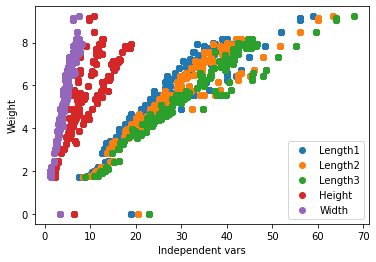

In [5]:
plt.figure(1);plt.xlabel("Independent vars");
plt.ylabel("Weight");
plt.scatter(xtrain["Length1"],ytrain,label="Length1")
plt.scatter(xtrain["Length2"],ytrain,label="Length2")
plt.scatter(xtrain["Length3"],ytrain,label="Length3")
plt.scatter(xtrain["Height"],ytrain,label="Height")
plt.scatter(xtrain["Width"],ytrain,label="Width")
plt.legend()

Hypothesis

Function implemented for the predictions with the linear model.

In [6]:
def hyp(weights,x):
    hyp=0
    for i in range(len(weights)):
        hyp+=(weights[i]*x[i])
    return hyp

Errors

Shows the actual improvement for the error mean and stores it for further plotting

In [7]:
evol=[]
def  error(weights,x,y):
    erracum=0
    for i in range(len(x)):
        p=hyp(weights,x[i])
#         print("p(x)=%f y(x)=%f" %(p,y[i]))
        erracum+=(p-y[i])**2
    errmean=erracum/len(x)
    evol.append(errmean)
    print("em=%f" %(errmean))

Gradient Descent

Give the actual weights for the model and according to the cost function returns new updated values

In [8]:
def gd(weights,x,y,a):
    tmp=list(weights)
    for j in range(len(weights)):
        acum=0;
        for i in range(len(x)):
            err=hyp(weights,x[i])-y[i]
            acum+=err*x[i][j]
        tmp[j]=weights[j]-a*(1/len(x))*acum
    return tmp

Main (Training Model)

At an alpha "a", run the whole code "gens" times, showing improvement and then displaying it into a graph.

em=18.395520
em=10.500294
em=6.077270
em=3.598929
em=2.209756
em=1.430604
em=0.993120
em=0.747008
em=0.608089
em=0.529221
em=0.483999
em=0.457634
em=0.441844
em=0.431989
em=0.425472
em=0.420837
em=0.417269
em=0.414310
em=0.411705
em=0.409311
em=0.407046
em=0.404866
em=0.402745
em=0.400668
em=0.398628
em=0.396619
em=0.394639
em=0.392686
em=0.390759
em=0.388857
em=0.386980
em=0.385127
em=0.383297
em=0.381491
em=0.379708
em=0.377948
em=0.376210
em=0.374494
em=0.372800
em=0.371128
em=0.369477
em=0.367847
em=0.366237
em=0.364648
em=0.363079
em=0.361530
em=0.360001
em=0.358491
em=0.357000
em=0.355528
em=0.354075
em=0.352640
em=0.351223
em=0.349824
em=0.348442
em=0.347078
em=0.345732
em=0.344402
em=0.343089
em=0.341793
em=0.340512
em=0.339248
em=0.338000
em=0.336768
em=0.335550
em=0.334349
em=0.333162
em=0.331990
em=0.330833
em=0.329690
em=0.328562
em=0.327447
em=0.326347
em=0.325260
em=0.324187
em=0.323127
em=0.322081
em=0.321047
em=0.320026
em=0.319018
em=0.318023
em=0.317040
em=0.316069
em

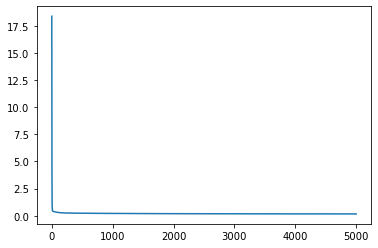

In [9]:
evol=[]
epoch=0
a=0.0006
gen=5000

weights=[0,0,0,0,0,0]
ylist=ytrain.values.tolist()
xlist=xtrain.values.tolist()
# print(xlist)
for i in range(len(xlist)):
    xlist[i]=[1]+xlist[i]

while True:
    old=list(weights)
    weights=gd(weights,xlist,ylist,a)
    error(weights,xlist,ylist)
    epoch+=1
    if(old==weights or epoch==gen):
        print ("Weights:")
        print (weights)
        break

plt.plot(evol)

Test

Evaluate with the test data, show graph relationa and error mean

Test error mean=0.070089


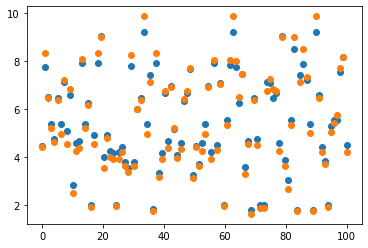

In [10]:
x = np.linspace(0,len(ytest),len(ytest))
plt.scatter(x,ytest)
p=(hyp(weights,[1,xtest["Length1"],xtest["Length2"],xtest["Length3"],xtest["Height"],xtest["Width"]]))
plt.scatter(x,p)

testem=0
p=p.values.tolist()
y=ytest.values.tolist()
for i in range(len(x)):
    testem+=(p[i]-y[i])**2
print("Test error mean=%f"%(testem/len(x)))

User queries

User iputs in order to get a result, dataset headset is display for info.

In [11]:
print(data)

        Species  Weight  Length1  Length2  Length3   Height   Width
548       Perch    40.0     13.8     15.0     16.0   3.8240  2.4320
281      Parkki   120.0     17.5     19.0     21.3   8.3922  2.9181
321      Parkki   300.0     24.0     26.0     29.0  11.3680  4.2340
806        Pike   510.0     40.0     42.5     45.5   6.8250  4.4590
623       Perch   145.0     20.7     22.7     24.2   5.9532  3.6300
...         ...     ...      ...      ...      ...      ...     ...
173       Bream   975.0     37.4     41.0     45.9  18.6354  6.7473
510       Perch   150.0     20.5     22.5     24.0   6.7920  3.6240
969       Roach   180.0     23.6     25.2     27.9   7.0866  3.9060
1078  Whitefish   270.0     24.1     26.5     29.3   8.1454  4.2485
291      Parkki    90.0     16.3     17.7     19.8   7.4052  2.6730

[1113 rows x 7 columns]


In [12]:
x0=float(input("Enter Length1:"))
x1=float(input("Enter Length2:"))
x2=float(input("Enter Length3:"))
x3=float(input("Enter Height:"))
x4=float(input("Enter Width:"))
pred=(hyp(weights,[1,x0,x1,x2,x3,x4]))**3.33333333333
print(pred)

Enter Length1: 24
Enter Length2: 26
Enter Length3: 29
Enter Height: 11.3680
Enter Width: 4.2340


275.6786964513114
